<a href="https://colab.research.google.com/github/braderjek/Jacob_DataVisualization/blob/main/Mall_Customers_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Mall Customer Segmentation

### Import Libraries

In [5]:
# general
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# clustering
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# 3D Visualization
import plotly as py
import plotly.graph_objs as go

### Exploratory Data Analysis

In [6]:
df = pd.read_csv('Mall_Customers.csv', index_col="CustomerID")

In [7]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


In [8]:
df.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 7.8+ KB


In [10]:
df.drop(columns=['Gender'], inplace=True)

<ipython-input-11-987528ed2b0f>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'])


<Axes: xlabel='Age', ylabel='Density'>

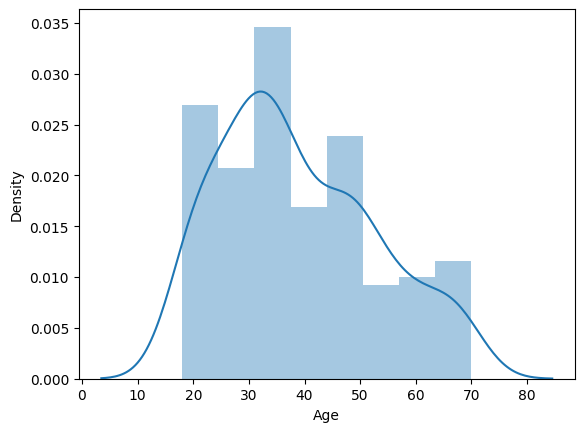

In [11]:
# age distribution
sns.distplot(df['Age'])

<ipython-input-12-ff1058305c7e>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Annual Income (k$)'])


<Axes: xlabel='Annual Income (k$)', ylabel='Density'>

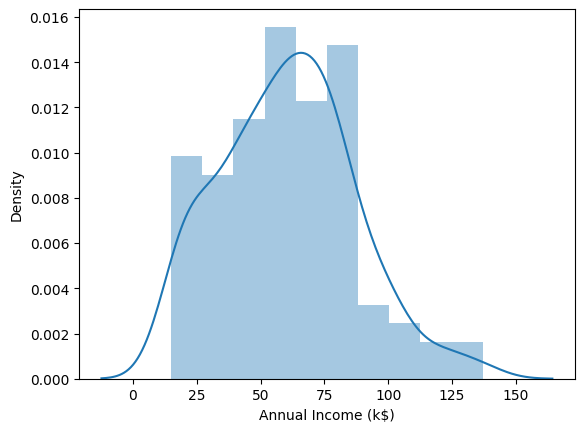

In [12]:
# annual income distribution
sns.distplot(df['Annual Income (k$)'])

<ipython-input-13-1bb4282b9559>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Spending Score (1-100)'])


<Axes: xlabel='Spending Score (1-100)', ylabel='Density'>

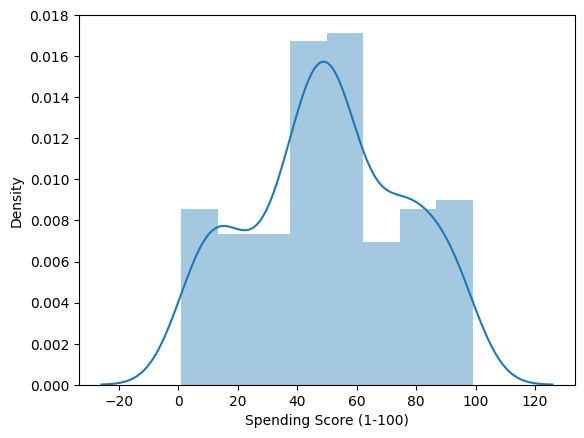

In [13]:
# Spending Score (1-100) distribution
sns.distplot(df['Spending Score (1-100)'])

### K-means clustering

In [14]:
df1 = df[['Annual Income (k$)','Spending Score (1-100)']]

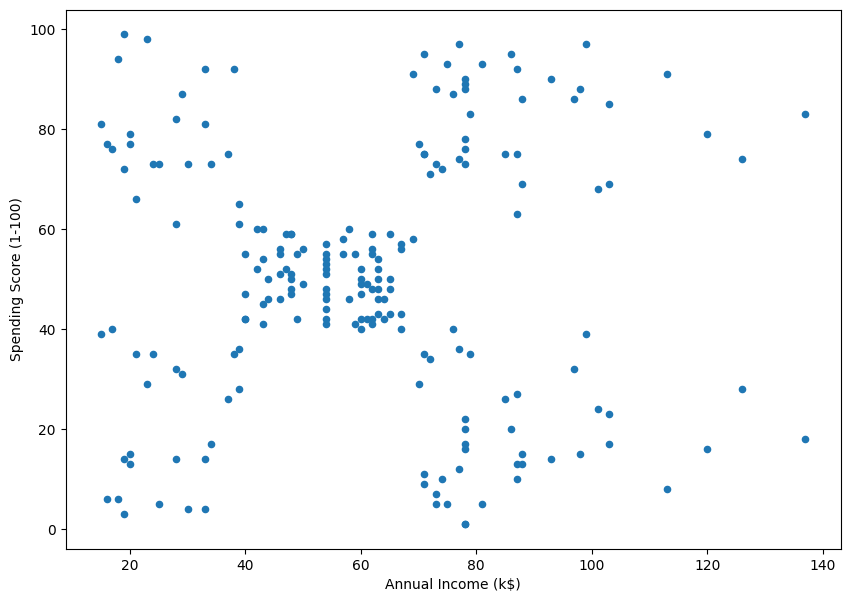

In [15]:
df1.plot(kind='scatter',
         x='Annual Income (k$)',
         y='Spending Score (1-100)',
         figsize=(10,7))
plt.show()

## Finding the optimal number of clusters with the elbow Method

In [16]:
sum_of_sqr_dist = {}
for k in range(1,10):
  km = KMeans(n_clusters=k, init='k-means++', max_iter=1000)
  km = km.fit(df1)
  sum_of_sqr_dist[k] = km.inertia_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

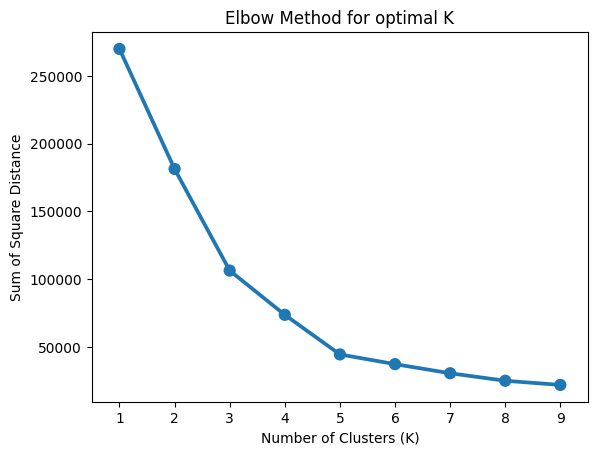

In [17]:
sns.pointplot(x=list(sum_of_sqr_dist.keys()), y=list(sum_of_sqr_dist.values()))
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Sum of Square Distance")
plt.title("Elbow Method for optimal K")
plt.show()

### K-Means Clustering

In [18]:
Model = KMeans(n_clusters=5,
               init='k-means++',
               max_iter=1000)
Model.fit(df1)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(max_iter=1000, n_clusters=5)

In [19]:
print("Labels", Model.labels_)

Labels [0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0
 4 0 4 0 4 0 2 0 4 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 1 3 1 2 1 3 1 3 1 2 1 3 1 3 1 3 1 3 1 2 1 3 1 3 1
 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3
 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1]


In [20]:
centroids = Model.cluster_centers_

In [21]:
df1_cluster = df1.copy()

In [22]:
df1_cluster['Cluster'] = Model.fit_predict(df1)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [23]:
df1_cluster.head()

,Annual Income (k$),Spending Score (1-100),Cluster
CustomerID,,,
1,15,39,0
2,15,81,3
3,16,6,0
4,16,77,3
5,17,40,0


### Visualizing Clusters

In [24]:
Color = ['red', 'green', 'gold', 'yellow', 'black']
df1_cluster['Color'] = df1_cluster['Cluster'].map(lambda p: Color[p])

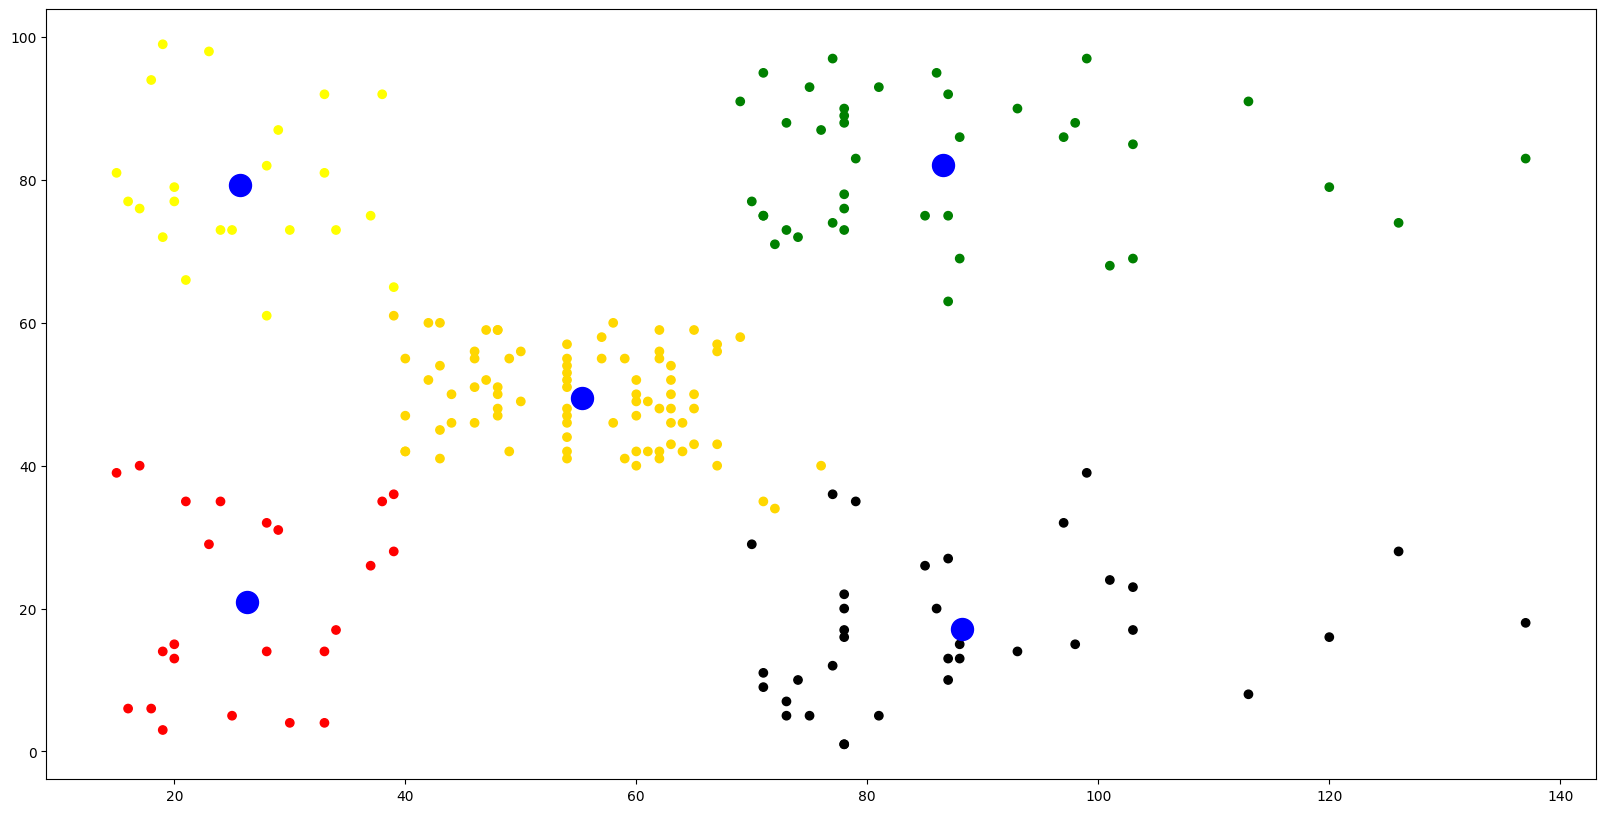

In [25]:
plt.figure(figsize = (20,10))
plt.scatter(df1['Annual Income (k$)'],
            df1['Spending Score (1-100)'],
               c=df1_cluster['Color'])

plt.scatter(centroids[:,0], centroids[:,1], c='blue', s=250)
plt.show()

In [26]:
 labels = Model.labels_

In [27]:
silhouette_score(df1, labels)

0.553931997444648

In [33]:
silhouette = {}

for k in range(2,8):
  km = KMeans(n_clusters=k, init='k-means++', max_iter=1000)
  km.fit(df1)
  silhouette[k] = silhouette_score(df1, km.labels_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

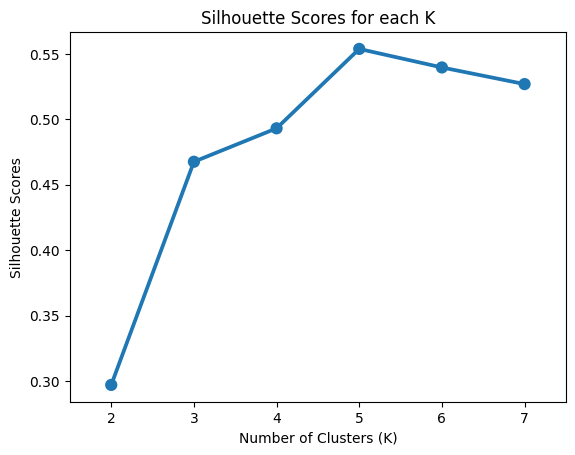

In [34]:
sns.pointplot(x=list(silhouette.keys()), y=list(silhouette.values()))
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Silhouette Scores")
plt.title("Silhouette Scores for each K")
plt.show()

## Client Segmentation with 3 Features

In [35]:
df2 = df.copy()

In [36]:
sum_of_sqr_dist = {}
for k in range(1,10):
  km = KMeans(n_clusters=k, init='k-means++', max_iter=1000)
  km = km.fit(df2)
  sum_of_sqr_dist[k] = km.inertia_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

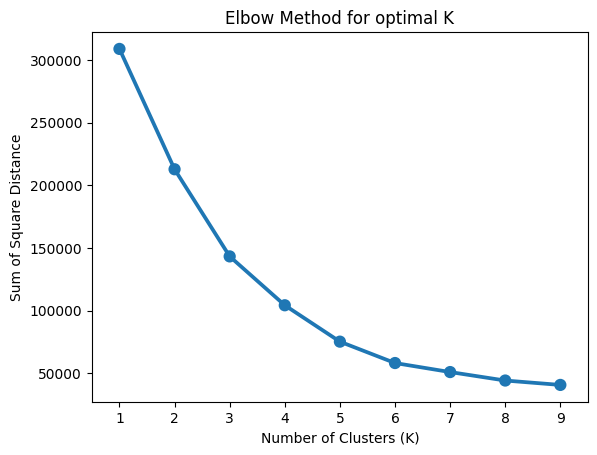

In [37]:
sns.pointplot(x=list(sum_of_sqr_dist.keys()), y=list(sum_of_sqr_dist.values()))
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Sum of Square Distance")
plt.title("Elbow Method for optimal K")
plt.show()

In [39]:
Model2 = KMeans(n_clusters=6, init='k-means++', max_iter=1000)
Model2.fit(df2)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(max_iter=1000, n_clusters=6)

In [40]:
df2['Cluster'] = Model2.fit_predict(df2)
df2.head()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,Age,Annual Income (k$),Spending Score (1-100),Cluster
CustomerID,,,,
1,19,15,39,4
2,21,15,81,5
3,20,16,6,4
4,23,16,77,5
5,31,17,40,4


__3D Visualization__

In [42]:
labels = Model2.labels_
centroids = Model2.cluster_centers_

In [49]:
df2['labels'] = labels
trace = go.Scatter3d(
    x=df2['Age'],
    y=df2['Annual Income (k$)'],
    z=df2['Spending Score (1-100)'],
    mode='markers',
    marker=dict(
        color=df2['labels'],
        size=5,
        line=dict(color=df2['labels'], width=12),
    ),
    opacity=0.8
)
data = [trace]
layout = go.Layout(
                  title = 'Clusters',
                  scene = dict(
                              xaxis = dict(title = 'Age'),
                              yaxis = dict(title = 'Annual Income (k$)'),
                              zaxis = dict(title = 'Spending Score (1-100)'))
                  )

fig = go.Figure(data = data, layout=layout)
py.offline.iplot(fig)
plt.show()